In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tetrahedron_dataset = pd.read_csv('/home/sei/tetrahedron_pair_ML/data/processed/train/train_data.csv')

### Dataset Structure:

In [2]:
tetrahedron_dataset.head()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,...,T2_v2_y,T2_v2_z,T2_v3_x,T2_v3_y,T2_v3_z,T2_v4_x,T2_v4_y,T2_v4_z,IntersectionVolume,HasIntersection
0,0.587007,0.938893,0.608622,0.452633,0.284390,0.801365,0.036179,0.461017,0.946660,0.991464,...,0.928626,0.844315,0.741366,0.526468,0.072608,0.010795,0.165809,0.796997,0.000316,1.0
1,0.148053,0.111456,0.879295,0.255739,0.537797,0.446246,0.995538,0.404679,0.566908,0.190556,...,0.985121,0.431268,0.684200,0.885616,0.144811,0.103781,0.681108,0.222691,0.000000,0.0
2,0.427317,0.791989,0.705007,0.416007,0.865585,0.077500,0.999303,0.488805,0.151524,0.398751,...,0.622867,0.645445,0.085114,0.168315,0.821926,0.780867,0.404753,0.193061,0.000000,0.0
3,0.425337,0.614792,0.352754,0.996329,0.676794,0.135607,0.109250,0.979793,0.874708,0.612971,...,0.752457,0.690536,0.666939,0.964818,0.803126,0.233980,0.192600,0.942602,0.000000,0.0
4,0.888854,0.370163,0.238297,0.957328,0.228059,0.889527,0.201096,0.882376,0.532527,0.341503,...,0.082526,0.557636,0.205697,0.988908,0.459174,0.798507,0.051721,0.512013,0.004671,1.0


- **Tetrahedrons:**
  - Each entry includes two tetrahedrons.
  - Each tetrahedron has four vertices.
  - Each vertex is defined by three coordinates (x, y, z).

- **Features:**
  - There are 12 features per tetrahedron, leading to 24 features total.
  - Column names follow the pattern `Tₜ_Vᵥ_α`, where:
    - `ₜ` = Tetrahedron number (1 or 2)
    - `ᵥ` = Vertex number (1 to 4)
    - `α` = Coordinate axis (x, y, or z)
  - Coordinates are normalized between 0 and 1.
  - Each coordinate is randomly generated through a i.i.d process.

- **Output Variables:**
  - **Intersection Status:**
    - Stored in the "intersection_status" column.
    - Values: `0` (no intersection) or `1` (intersection).
  - **Intersection Volume:**
    - Stored in the "intersection_volume" column.
    - Value is a non-negative real number.

### Input and Output Spaces:

- **Input Space:**
  - Represented as a vector in $\mathbb{R}^{24}$, where each coordinate is within the range $[0, 1]$.

- **Output Space:**
  - $\{0, 1\}$ for "intersection_status".
  - $\mathbb{R}^{\geq 0}$ for "intersection_volume"

### Statistics


In [3]:
tetrahedron_dataset.describe()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,...,T2_v2_y,T2_v2_z,T2_v3_x,T2_v3_y,T2_v3_z,T2_v4_x,T2_v4_y,T2_v4_z,IntersectionVolume,HasIntersection
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000
mean,0.501980,0.501339,0.500340,0.501582,0.500387,0.501218,0.502752,0.499365,0.500567,0.499738,...,0.498222,0.498277,0.501729,0.500661,0.501022,0.499532,0.499552,0.502809,2.499979e-03,0.500000
std,0.293365,0.293591,0.293151,0.291040,0.292970,0.291990,0.293039,0.293499,0.291877,0.291766,...,0.292913,0.293501,0.293064,0.293343,0.291845,0.293074,0.293579,0.292330,3.227566e-03,0.500013
min,0.000082,0.000016,0.000033,0.000041,0.000010,0.000013,0.000159,0.000050,0.000022,0.000144,...,0.000063,0.000078,0.000114,0.000011,0.000019,0.000020,0.000111,0.000052,0.000000e+00,0.000000
25%,0.243253,0.241869,0.243289,0.248512,0.241163,0.245800,0.244279,0.241467,0.243579,0.243899,...,0.238983,0.241003,0.242233,0.245611,0.247895,0.240031,0.238076,0.248536,0.000000e+00,0.000000
50%,0.504128,0.504073,0.502970,0.499240,0.501831,0.503144,0.505080,0.497030,0.499376,0.498242,...,0.497447,0.498316,0.502344,0.502168,0.500110,0.503993,0.500224,0.503352,4.300000e-15,0.500000
75%,0.762993,0.758338,0.760280,0.757817,0.756756,0.756608,0.759091,0.758980,0.755980,0.754468,...,0.755371,0.756832,0.761452,0.757457,0.756456,0.754705,0.757936,0.760194,4.999501e-03,1.000000
max,0.999935,0.999994,0.999982,0.999803,0.999934,0.999954,0.999949,0.999994,0.999965,0.999924,...,1.000000,0.999955,0.999967,0.999999,0.999939,0.999988,0.999916,0.999922,9.999427e-03,1.000000


#### Class Balance

In [4]:
total_entries = len(tetrahedron_dataset)
status_0_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 0].shape[0]
status_1_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 1].shape[0]

percentage_status_0 = (status_0_count / total_entries) * 100
percentage_status_1 = (status_1_count / total_entries) * 100

print(f"Percentage of entries with HasIntersection = 0: {percentage_status_0:.2f}%")
print(f"Percentage of entries with HasIntersection = 1: {percentage_status_1:.2f}%")

Percentage of entries with HasIntersection = 0: 50.00%
Percentage of entries with HasIntersection = 1: 50.00%


#### Coordinates distribution

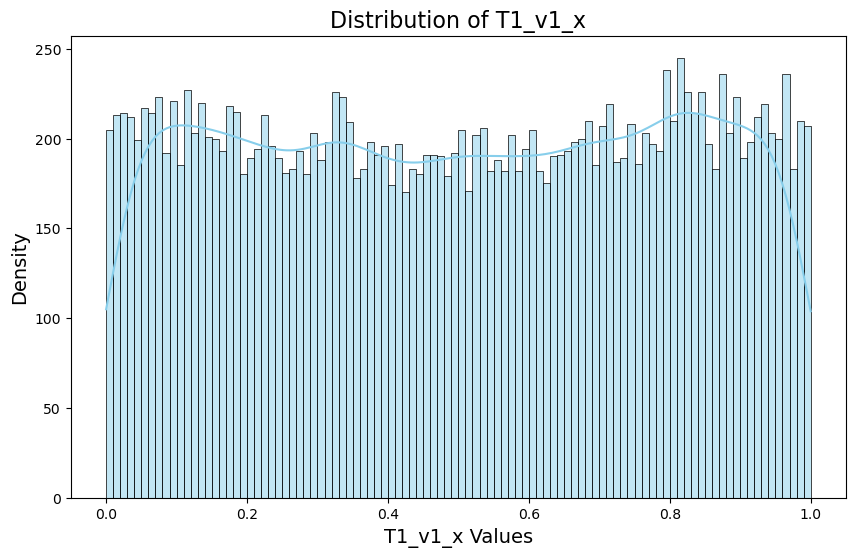

In [5]:
# Plotting the distribution of 'T1_v1_x' (Tₜ_Vᵥ_α, will have similar distributions)
plt.figure(figsize=(10, 6))
sns.histplot(tetrahedron_dataset['T1_v1_x'], kde=True, bins=100, color='skyblue')
plt.title('Distribution of T1_v1_x', fontsize=16)
plt.xlabel('T1_v1_x Values', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

#### Coordinates precision

In [6]:
# Extract all coordinate columns
coordinate_columns = [col for col in tetrahedron_dataset.columns if '_v' in col]

def calculate_precision(value):
    value_str = str(value)
    if '.' in value_str:
        return len(value_str.split('.')[1])
    else:
        return 0

max_precision = 0

for col in coordinate_columns:
    col_precision = tetrahedron_dataset[col].map(calculate_precision)
    max_precision = max(max_precision, col_precision.max())

print(f"Max coordinate precision in the dataset: {max_precision} decimal places")

Max coordinate precision in the dataset: 16 decimal places


#### Volume distribution

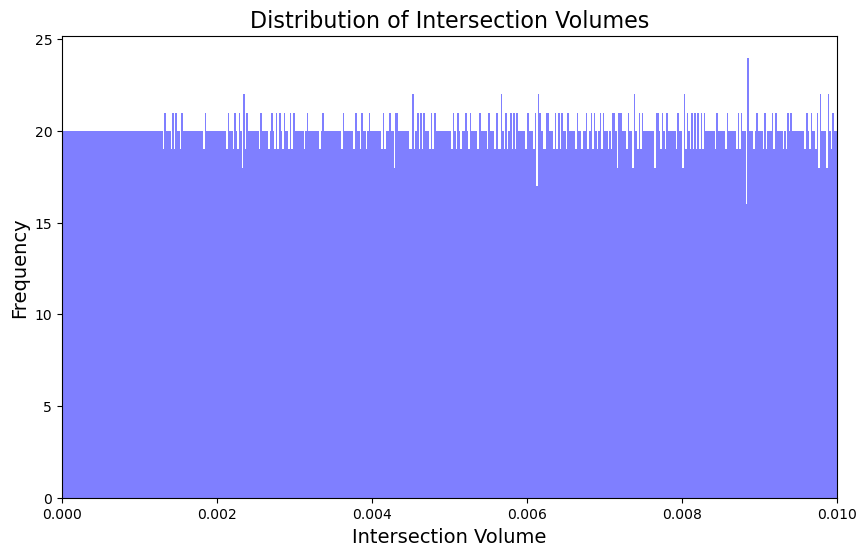

In [7]:
intersecting_cases = tetrahedron_dataset[tetrahedron_dataset['IntersectionVolume'] > 0]
plt.figure(figsize=(10, 6))
plt.hist(intersecting_cases['IntersectionVolume'], bins=500, color='blue', alpha=0.5)
plt.title('Distribution of Intersection Volumes', fontsize=16)
plt.xlabel('Intersection Volume', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0, 0.01)
plt.show()